In [1]:
import os
os.chdir('../..')
!ls

future_trade


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pyomo.environ import *
from pyomo.mpec import *
import math
import datetime
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from future_trade.spatial_trade_model.functions_general import *
from future_trade.spatial_trade_model.functions_calibration import *
from pathos.multiprocessing import ProcessPool, cpu_count

In [3]:
data_dir = '../../OPSIS/Data/Trade_clearance_model'
calibration_output = f'{data_dir}/Output/Calibration/'

In [125]:
for crop_code in [
    'jwhea', 'jrice', 'jmaiz', 'jsoyb', 'jbarl', 'jcass', 
    # 'jmill', 'jsorg', 
    # 'jocer', 'jpota', 'jyams', 'jswpt', 'jorat', 
    # 'jvege', 'jbana', 'jplnt', 'jsubf', 'jtemf', 'jbean', 
    # 'jchkp', 'jcowp', 'jlent', 'jpigp', 'jopul', 
    # 'jgrnd', 'jothr', 'jrpsd', 'jsnfl', 'jtols', 'jpalm', 
    # 'jsugb', 'jsugc'
    ]:
    print(crop_code)
    df_country = pd.read_csv(f'{data_dir}/Input/Country_data/country_information_'+str(crop_code)+'.csv')
    df_bil = pd.read_csv(f'{data_dir}/Input/Trade_cost/bilateral_trade_cost_'+str(crop_code)+'.csv')
    
    trade_cal = pd.read_csv(f'{calibration_output}trade_calibration_{crop_code}.csv', header=None)
    trade_cal.columns = ['from_abbreviation', 'to_abbreviation', 'trade_cal']
    trade_cal['trade_cal'] = trade_cal['trade_cal'] * 1000

    calib = pd.read_csv(f'{calibration_output}calib_calibration_{crop_code}.csv', header=None)
    calib.columns = ['from_abbreviation', 'to_abbreviation', 'calib']

    tc = pd.read_csv(f'{calibration_output}tc_calibration_{crop_code}.csv', header=None)
    tc.columns = ['from_abbreviation', 'to_abbreviation', 'tc']

    conprice = pd.read_csv(f'{calibration_output}conprice_calibration_{crop_code}.csv', header=None)
    conprice.columns = ['abbreviation', 'conprice']

    prodprice = pd.read_csv(f'{calibration_output}prodprice_calibration_{crop_code}.csv', header=None)
    prodprice.columns = ['abbreviation', 'prodprice']
    
    print(f'rows in calibrated trade: {trade_cal.shape}')

    df_bil = df_bil.merge(trade_cal)
    print(f"accuracy: {len(df_bil[(df_bil['trade_cal']>1)==(df_bil['q_calib']>1)])/(len(df_bil))}")
    print(f"precision: {len(df_bil[(df_bil['trade_cal']>1) & (df_bil['q_calib']>1)]) / len(df_bil[(df_bil['trade_cal']>1)])}")
    print(f"recall: {len(df_bil[(df_bil['trade_cal']>1) & (df_bil['q_calib']>1)]) / len(df_bil[(df_bil['q_calib']>1)])}")
    print(f"r2 linear: {r2_score(df_bil['q_calib'], df_bil['trade_cal'])}")
    print(f"r2 log: {r2_score(np.log(df_bil['q_calib']+1), np.log(df_bil['trade_cal']+1))}")
    print(f"r2 linear excl dom sup: {r2_score(df_bil[df_bil['from_abbreviation']!=df_bil['to_abbreviation']]['q_calib'], df_bil[df_bil['from_abbreviation']!=df_bil['to_abbreviation']]['trade_cal'])}")
    print(f"r2 log excl dom sup: {r2_score(np.log(df_bil[df_bil['from_abbreviation']!=df_bil['to_abbreviation']]['q_calib']+1), np.log(df_bil[df_bil['from_abbreviation']!=df_bil['to_abbreviation']]['trade_cal']+1))}")
    print(f"rmse: {np.sqrt(mean_squared_error(df_bil['q_calib'], df_bil['trade_cal']))}")

jwhea
rows in calibrated trade: (23409, 3)
accuracy: 0.90319962407621
precision: 0.8671273445212241
recall: 0.7338345864661654
r2 linear: 0.9999990564774628
r2 log: 0.7265731784570998
r2 linear excl dom sup: 0.9998860477784629
r2 log excl dom sup: 0.7140511467497511
rmse: 1184.5175669216483
jrice
rows in calibrated trade: (23409, 3)
accuracy: 0.897518048613781
precision: 0.9290917921321029
recall: 0.45919347095535284
r2 linear: 0.999999358697712
r2 log: 0.668760410561031
r2 linear excl dom sup: 0.9990427701582278
r2 log excl dom sup: 0.6355702433455448
rmse: 1041.4764159822096
jmaiz
rows in calibrated trade: (23409, 3)
accuracy: 0.8902131658763723
precision: 0.8556990454800674
recall: 0.5971786833855799
r2 linear: 0.9999998526827631
r2 log: 0.6944157185866421
r2 linear excl dom sup: 0.9999881557498888
r2 log excl dom sup: 0.6549089141952693
rmse: 1034.2555816635738
jsoyb
rows in calibrated trade: (23409, 3)
accuracy: 0.8904267589388697
precision: 0.7220949263502455
recall: 0.5624681285

In [126]:
crop_code = 'jcass'

In [127]:
df_country = pd.read_csv(f'{data_dir}/Input/Country_data/country_information_'+str(crop_code)+'.csv')
df_bil = pd.read_csv(f'{data_dir}/Input/Trade_cost/bilateral_trade_cost_'+str(crop_code)+'.csv')

trade_cal = pd.read_csv(f'{calibration_output}trade_calibration_{crop_code}.csv', header=None)
trade_cal.columns = ['from_abbreviation', 'to_abbreviation', 'trade_cal']
trade_cal['trade_cal'] = trade_cal['trade_cal'] * 1000

calib = pd.read_csv(f'{calibration_output}calib_calibration_{crop_code}.csv', header=None)
calib.columns = ['from_abbreviation', 'to_abbreviation', 'calib']

tc = pd.read_csv(f'{calibration_output}tc_calibration_{crop_code}.csv', header=None)
tc.columns = ['from_abbreviation', 'to_abbreviation', 'tc']

conprice = pd.read_csv(f'{calibration_output}conprice_calibration_{crop_code}.csv', header=None)
conprice.columns = ['abbreviation', 'conprice']

prodprice = pd.read_csv(f'{calibration_output}prodprice_calibration_{crop_code}.csv', header=None)
prodprice.columns = ['abbreviation', 'prodprice']

In [128]:
calib.describe()

,calib
count,23104.000000
mean,0.406560
std,4.479840
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,205.933337


In [129]:
tc.describe()

,tc
count,23104.000000
mean,183.184358
std,77.737459
min,2.215021
25%,130.138665
50%,162.662924
75%,215.975422
max,678.182633


In [130]:
conprice.describe()

,conprice
count,152.000000
mean,370.290895
std,104.606825
min,190.130115
25%,306.572437
50%,353.238300
75%,430.594226
max,960.181990


In [131]:
prodprice.describe()

,prodprice
count,152.000000
mean,505.891745
std,599.403543
min,108.664701
25%,248.576088
50%,411.359617
75%,552.995655
max,5279.546444


In [132]:
calib.sort_values('calib').tail(100)

,from_abbreviation,to_abbreviation,calib
20290,THA,KHM,25.258867
20292,THA,LAO,25.452794
20284,THA,JAM,25.674237
22278,VNM,MMR,26.040162
22203,VNM,BGD,26.224584
...,...,...,...
20246,THA,COL,139.970081
20359,THA,USA,146.025520
20361,THA,VEN,161.101287
16947,PRK,KOR,201.374775


In [133]:
tc[(tc['from_abbreviation']=='PRK') & (tc['to_abbreviation']=='KOR')]

,from_abbreviation,to_abbreviation,tc
16947,PRK,KOR,250.270846


In [134]:
calib[(calib['from_abbreviation']=='PRK') & (calib['to_abbreviation']=='KOR')]

,from_abbreviation,to_abbreviation,calib
16947,PRK,KOR,201.374775


In [135]:
df_bil[['trade_USD_t']].describe()

,trade_USD_t
count,23409.000000
mean,183.734522
std,77.738295
min,14.341609
25%,130.302544
50%,163.260262
75%,216.897932
max,678.296006


In [136]:
df_country['prod_price_USD_t'].describe()

count     153.000000
mean      528.442781
std       614.451207
min        70.200000
25%       219.269355
50%       476.413792
75%       575.076409
max      5302.039802
Name: prod_price_USD_t, dtype: float64

In [137]:
d = df_bil[['from_abbreviation', 'to_abbreviation', 'trade_USD_t']].merge(tc)
r2_score(d['trade_USD_t'], d['tc'])

0.9949126268584988

In [138]:
np.sqrt(mean_squared_error(d['trade_USD_t'], d['tc']))

5.539991056647455

In [139]:
d = df_country[['abbreviation', 'prod_price_USD_t']].merge(prodprice)
r2_score(d['prod_price_USD_t'], d['prodprice'])

0.9696345196803166

In [140]:
np.sqrt(mean_squared_error(d['prod_price_USD_t'], d['prodprice']))

106.98258833724945

In [141]:
df_bil = df_bil.merge(trade_cal)

In [142]:
df_bil[['q_calib', 'trade_cal']].describe()

,q_calib,trade_cal
count,2.310400e+04,2.310400e+04
mean,1.353137e+04,1.354744e+04
std,5.703275e+05,5.703271e+05
min,0.000000e+00,1.000000e+00
25%,0.000000e+00,1.000000e+00
50%,0.000000e+00,1.000000e+00
75%,6.770712e-05,1.000000e+00
max,5.940633e+07,5.940633e+07


In [143]:
df_bil[['q_calib', 'trade_cal']].sum()

q_calib      3.126288e+08
trade_cal    3.130001e+08
dtype: float64

In [144]:
df_bil[df_bil['from_abbreviation']!=df_bil['to_abbreviation']][['q_calib', 'trade_cal']].sum()

q_calib      3.489608e+07
trade_cal    3.540712e+07
dtype: float64

In [145]:
df_bil[df_bil['q_calib']>1].shape

(1639, 10)

In [146]:
df_bil[df_bil['trade_cal']>1].shape

(968, 10)

In [147]:
# false positives
df_bil[(df_bil['trade_cal']>1) & (df_bil['q_calib']<=1)][['q_calib', 'trade_cal']].describe()

,q_calib,trade_cal
count,3.290000e+02,329.000000
mean,7.267263e-02,1553.227964
std,1.780864e-01,2958.732849
min,0.000000e+00,2.000000
25%,0.000000e+00,283.000000
50%,6.725515e-08,801.000000
75%,2.886084e-02,1749.000000
max,9.449741e-01,31303.000000


In [148]:
df_bil[(df_bil['trade_cal']>1) & (df_bil['q_calib']<=1)].sort_values('trade_cal').tail()

,from_abbreviation,to_abbreviation,IMPACT_code,trade_USD_t,adv,q_calib,trade_relationship,q_old,trade_relationship_old,trade_cal
20340,THA,SOM,jcass,155.250714,0.0,0.038258,0,0.000000,0,11003.0
22239,VNM,GAB,jcass,137.056994,0.3,0.039352,0,0.003570,0,11247.0
22221,VNM,COG,jcass,164.155343,0.2,0.192367,0,0.515862,0,12622.0
16947,PRK,KOR,jcass,48.896071,0.0,0.000000,0,0.000000,0,30610.0
11475,KOR,KOR,jcass,28.586094,0.0,0.000000,0,0.000000,0,31303.0


In [149]:
# false negatives
df_bil[(df_bil['trade_cal']==1) & (df_bil['q_calib']>1)][['q_calib', 'trade_cal']].describe()

,q_calib,trade_cal
count,1000.000000,1000.0
mean,424.549137,1.0
std,2846.952949,0.0
min,1.001309,1.0
25%,2.810082,1.0
50%,9.552086,1.0
75%,50.105489,1.0
max,57591.491343,1.0


In [150]:
df_bil[(df_bil['trade_cal']==1) & (df_bil['q_calib']>1)].sort_values('q_calib').tail()

,from_abbreviation,to_abbreviation,IMPACT_code,trade_USD_t,adv,q_calib,trade_relationship,q_old,trade_relationship_old,trade_cal
15912,OPO,OPO,jcass,28.088628,0.000048,16270.455413,1,17768.523315,1,1.0
1530,BFA,BFA,jcass,51.545859,0.000000,17019.238207,1,22952.976065,1,1.0
20655,TLS,TLS,jcass,23.164005,0.000000,19144.361157,1,27689.144000,1,1.0
7956,GNB,GNB,jcass,39.424150,0.000000,52281.652822,1,42528.572000,1,1.0
15759,OIO,OIO,jcass,35.311535,0.000000,57591.491343,1,53094.337515,1,1.0


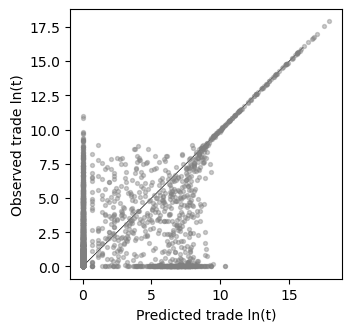

In [151]:
fig, ax = plt.subplots(figsize = (3.5,3.5))
plt.scatter(np.log(df_bil['trade_cal']), np.log(df_bil['q_calib']+1), s = 8, color = 'grey', alpha = 0.4, zorder = 3)
plt.plot(np.linspace(0,16, 100), np.linspace(0,16, 100), color = 'k', lw = 0.5, zorder = 1)
# plt.xlim(0, 12); 
plt.xlabel('Predicted trade ln(t)')
# plt.ylim(0, 12); 
plt.ylabel('Observed trade ln(t)')
plt.show()

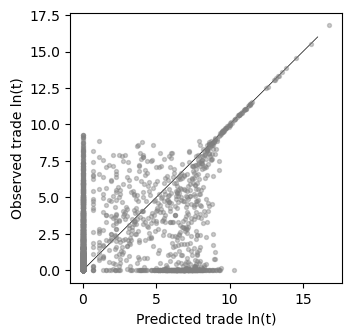

In [152]:
fig, ax = plt.subplots(figsize = (3.5,3.5))
plt.scatter(np.log(df_bil[df_bil['from_abbreviation']!=df_bil['to_abbreviation']]['trade_cal']), 
            np.log(df_bil[df_bil['from_abbreviation']!=df_bil['to_abbreviation']]['q_calib']+1), 
            s = 8, color = 'grey', alpha = 0.4, zorder = 3)
plt.plot(np.linspace(0,16, 100), np.linspace(0,16, 100), color = 'k', lw = 0.5, zorder = 1)
# plt.xlim(0, 12); 
plt.xlabel('Predicted trade ln(t)')
# plt.ylim(0, 12); 
plt.ylabel('Observed trade ln(t)')
plt.show()

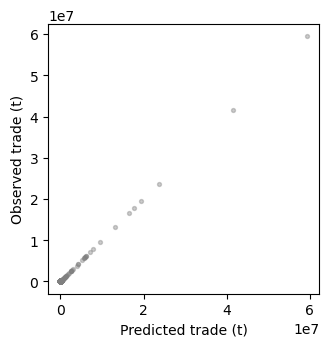

In [153]:
fig, ax = plt.subplots(figsize = (3.5,3.5))
plt.scatter(df_bil['trade_cal'], df_bil['q_calib'], s = 8, color = 'grey', alpha = 0.4, zorder = 3)
# plt.plot(np.linspace(0,16, 100), np.linspace(0,16, 100), color = 'k', lw = 0.5, zorder = 1)
# plt.xlim(0, 12); 
plt.xlabel('Predicted trade (t)')
# plt.ylim(0, 12); 
plt.ylabel('Observed trade (t)')
plt.show()

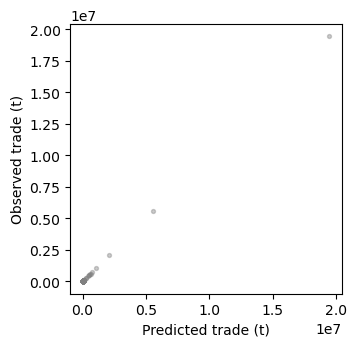

In [154]:
fig, ax = plt.subplots(figsize = (3.5,3.5))
plt.scatter(df_bil[df_bil['from_abbreviation']!=df_bil['to_abbreviation']]['trade_cal'], 
            df_bil[df_bil['from_abbreviation']!=df_bil['to_abbreviation']]['q_calib'], 
            s = 8, color = 'grey', alpha = 0.4, zorder = 3)
# plt.plot(np.linspace(0,16, 100), np.linspace(0,16, 100), color = 'k', lw = 0.5, zorder = 1)
# plt.xlim(0, 12); 
plt.xlabel('Predicted trade (t)')
# plt.ylim(0, 12); 
plt.ylabel('Observed trade (t)')
plt.show()